<a href="https://colab.research.google.com/github/arumlim/eileen/blob/master/06_time_series_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 금융 시계열 데이터 분석에 유용한 pandas 함수들

#### Shifting and lags
우리는 원하는 시간 주기로 간격만큼 index를 shift할 수 있다. <br/>
shift 함수는 pandas를 이용할때 다양한 곳에서 유용하게 사용된다. 다른 시간의 시계열 데이터와 비교할 때 유용하다.<br/>


In [ ]:
!pip install -U finance-datareader

In [ ]:
import FinanceDataReader as fdr
aapl_df = fdr.DataReader('AAPL', '2018')
aapl_df.head(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,43.06,42.54,43.08,42.31,102220000.0,0.0177
2018-01-03,43.06,43.13,43.64,42.99,118070000.0,0.0000
2018-01-04,43.26,43.13,43.37,43.02,89740000.0,0.0046
2018-01-05,43.75,43.36,43.84,43.26,94640000.0,0.0113
2018-01-08,43.59,43.59,43.90,43.48,82270000.0,-0.0037
2018-01-09,43.58,43.64,43.77,43.35,86340000.0,-0.0002
2018-01-10,43.57,43.29,43.58,43.25,95840000.0,-0.0002
2018-01-11,43.82,43.65,43.87,43.62,74670000.0,0.0057
2018-01-12,44.27,44.05,44.34,43.91,101670000.0,0.0103


In [ ]:
aapl_df['Close_lag1'] = aapl_df['Close'].shift(1) 

In [ ]:
aapl_df.head()

,Close,Open,High,Low,Volume,Change,Close_lag1
Date,,,,,,,
2018-01-02,43.06,42.54,43.08,42.31,102220000.0,0.0177,NaN
2018-01-03,43.06,43.13,43.64,42.99,118070000.0,0.0000,43.06
2018-01-04,43.26,43.13,43.37,43.02,89740000.0,0.0046,43.06
2018-01-05,43.75,43.36,43.84,43.26,94640000.0,0.0113,43.26
2018-01-08,43.59,43.59,43.90,43.48,82270000.0,-0.0037,43.75


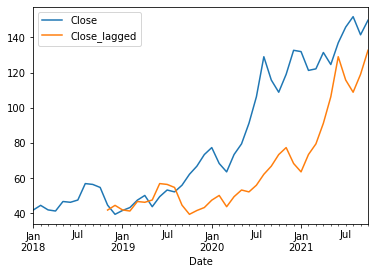

In [ ]:
aapl_df['Close'].asfreq('M',method='ffill').plot(legend=True) # 한달 씩 샘플링하고 데이터가 없는경우 이전데이터로 채운다.
shifted = aapl_df['Close'].asfreq('M',method='ffill').shift(10).plot(legend = True) # shift 10개월
shifted.legend(['Close','Close_lagged'])

#### Percent change

우리는 금융시계열을 다루니 하루하루 주가가 어느정도 변동하는지 간단하게 살펴보자.

In [ ]:
aapl_df['pct_change'] = aapl_df['Close'].pct_change()

In [ ]:
aapl_df.head(10)

,Close,Open,High,Low,Volume,Change,Close_lag1,pct_change
Date,,,,,,,,
2018-01-02,43.06,42.54,43.08,42.31,102220000.0,0.0177,NaN,NaN
2018-01-03,43.06,43.13,43.64,42.99,118070000.0,0.0000,43.06,0.000000
2018-01-04,43.26,43.13,43.37,43.02,89740000.0,0.0046,43.06,0.004645
2018-01-05,43.75,43.36,43.84,43.26,94640000.0,0.0113,43.26,0.011327
2018-01-08,43.59,43.59,43.90,43.48,82270000.0,-0.0037,43.75,-0.003657
2018-01-09,43.58,43.64,43.77,43.35,86340000.0,-0.0002,43.59,-0.000229
2018-01-10,43.57,43.29,43.58,43.25,95840000.0,-0.0002,43.58,-0.000229
2018-01-11,43.82,43.65,43.87,43.62,74670000.0,0.0057,43.57,0.005738
2018-01-12,44.27,44.05,44.34,43.91,101670000.0,0.0103,43.82,0.010269


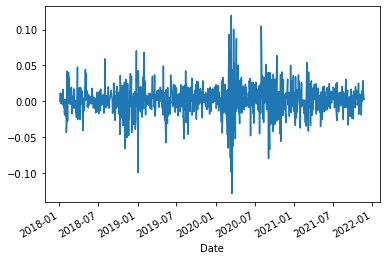

In [ ]:
aapl_df['Close'].pct_change().plot()

#### Diff

In [ ]:
aapl_df['Close_diff'] = aapl_df['Close'].diff()

Date
2018-01-02     NaN
2018-01-03    0.00
2018-01-04    0.20
2018-01-05    0.49
2018-01-08   -0.16
Name: Close, dtype: float64


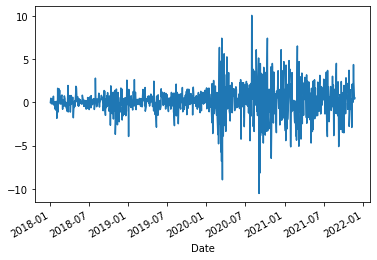

In [ ]:
print(aapl_df['Close'].diff().head())
aapl_df['Close'].diff().plot()

Date
2018-01-02         NaN
2018-01-03    0.000000
2018-01-04    0.004645
2018-01-05    0.011327
2018-01-08   -0.003657
Name: Close, dtype: float64


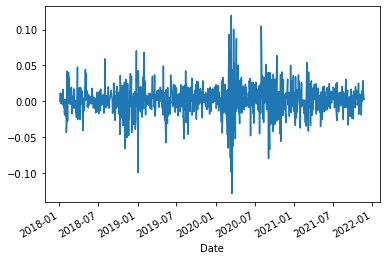

In [ ]:
print((aapl_df['Close'] /aapl_df['Close'].shift(1) -1).head()) # pct_change
(aapl_df['Close'] /aapl_df['Close'].shift(1) -1).plot()

#### 이동평균

In [ ]:
aapl_df['MA'] = aapl_df['Close'].rolling(window = 5).mean()

In [ ]:
aapl_df.head(10)

,Close,Open,High,Low,Volume,Change,Close_lag1,pct_change,Close_diff,MA
Date,,,,,,,,,,
2018-01-02,43.06,42.54,43.08,42.31,102220000.0,0.0177,NaN,NaN,NaN,NaN
2018-01-03,43.06,43.13,43.64,42.99,118070000.0,0.0000,43.06,0.000000,0.00,NaN
2018-01-04,43.26,43.13,43.37,43.02,89740000.0,0.0046,43.06,0.004645,0.20,NaN
2018-01-05,43.75,43.36,43.84,43.26,94640000.0,0.0113,43.26,0.011327,0.49,NaN
2018-01-08,43.59,43.59,43.90,43.48,82270000.0,-0.0037,43.75,-0.003657,-0.16,43.344
2018-01-09,43.58,43.64,43.77,43.35,86340000.0,-0.0002,43.59,-0.000229,-0.01,43.448
2018-01-10,43.57,43.29,43.58,43.25,95840000.0,-0.0002,43.58,-0.000229,-0.01,43.550
2018-01-11,43.82,43.65,43.87,43.62,74670000.0,0.0057,43.57,0.005738,0.25,43.662
2018-01-12,44.27,44.05,44.34,43.91,101670000.0,0.0103,43.82,0.010269,0.45,43.766


In [ ]:
type(aapl_df['Close'].rolling(window = 5))

pandas.core.window.rolling.Rolling

#### Resampling

* Upsampling : 시계열을 Low frequency에서 high frequency로 변환한다. 누란된 데이터를 채우거나 보간하는 방법을 포함한다. (월간 -> 일)

* Downsampling : 시계열을 high frequency에서 low frequency로 변환한다. 기존 데이터를 집계하는 것을 포함.(주간 -> 월 ) or (일간 -> 주간)

=> 하지만 금융시계열 같은 경우는 각 시간 데이터가 중요하기에 Downsampling을 살펴보겠다

date_range : https://pandas.pydata.org/docs/reference/api/pandas.date_range.html

In [ ]:
import pandas as pd
index = pd.date_range(start = '2019-01-01',end= '2019-10-01',freq='B')
series = pd.Series(range(len(index)), index=index)


In [ ]:
index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-23',
               '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27',
               '2019-09-30', '2019-10-01'],
              dtype='datetime64[ns]', length=196, freq='B')

In [ ]:
series

2019-01-01      0
2019-01-02      1
2019-01-03      2
2019-01-04      3
2019-01-07      4
             ... 
2019-09-25    191
2019-09-26    192
2019-09-27    193
2019-09-30    194
2019-10-01    195
Freq: B, Length: 196, dtype: int64

In [ ]:
series.resample(rule='M').sum()

2019-01-31     253
2019-02-28     650
2019-03-31    1113
2019-04-30    1639
2019-05-31    2231
2019-06-30    2370
2019-07-31    3220
2019-08-31    3575
2019-09-30    3864
2019-10-31     195
Freq: M, dtype: int64

In [ ]:
series.resample(rule='M').last()

2019-01-31     22
2019-02-28     42
2019-03-31     63
2019-04-30     85
2019-05-31    108
2019-06-30    128
2019-07-31    151
2019-08-31    173
2019-09-30    194
2019-10-31    195
Freq: M, dtype: int64

In [ ]:
series.resample(rule='MS').first()

2019-01-01      0
2019-02-01     23
2019-03-01     43
2019-04-01     64
2019-05-01     86
2019-06-01    109
2019-07-01    129
2019-08-01    152
2019-09-01    174
2019-10-01    195
Freq: MS, dtype: int64